## About the Company

 Urška Sršen and Sando Mur founded **BellaBeat**, a high-tech company that manufactures health-focused smart products. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. 

## Question for Analysis

* What are some trends in smart device usage? 
* How could these trends apply to Bellabeat customers? 
* How could these trends help influence Bellabeat marketing strategy?

## Business Task Summery

The main goal of this project is to analyze the smart device usage data in order to gain insights into how consumers use non-Bellabeat smart devices. These insights will then be applied to Bellabeat products which will help generate possible recommendations for the company’s future marketing strategies.

## Data Source

The data for this task was collected from kaggle notebook FitBit Fitness Tracker data see <https://www.kaggle.com/datasets/arashnic/fitbit>

In [1]:
## Loading Packages

library(tidyverse)
library(janitor)
library(dplyr)
library(tidyr)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
## Importing Data

DailyAct<-read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
SleepData<-read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
HrsStep<-read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
head(DailyAct)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Duplicate data and whitespace removed using Google Sheet


# Separating Date and Time column in the Dataset to fix date/time formating

In [3]:
SD<-separate(SleepData ,SleepDay, into  = c("ActivityDate","Time"), sep = ' ')
HrsStep$ActivityHour=as.POSIXct(HrsStep$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
HrsStep<-separate(HrsStep, ActivityHour,into = c("ActivityDate","Time"), sep = " ")

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


## Exploring dailyActivity_merged data

In [4]:
n_distinct(DailyAct) #Total unique rows
n_distinct(DailyAct$Id) # Total unique Id
# Quick summery
DailyAct %>%
  select(VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance) %>%
  summary()
DailyAct %>%
  select(TotalSteps, VeryActiveMinutes, FairlyActiveMinutes,
         LightlyActiveMinutes, SedentaryMinutes) %>%
  summary()

[1] 940

[1] 33

 VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
 Min.   : 0.000     Min.   :0.0000           Min.   : 0.000     
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.: 1.945     
 Median : 0.210     Median :0.2400           Median : 3.365     
 Mean   : 1.503     Mean   :0.5675           Mean   : 3.341     
 3rd Qu.: 2.053     3rd Qu.:0.8000           3rd Qu.: 4.782     
 Max.   :21.920     Max.   :6.4800           Max.   :10.710     

   TotalSteps    VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :    0   Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.: 3790   1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median : 7406   Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 7638   Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.:10727   3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :36019   Max.   :210.00    Max.   :143.00      Max.   :518.0       
 SedentaryMinutes
 Min.   :   0.0  
 1st Qu.: 729.8  
 Median :1057.5  
 Mean   : 991.2  
 3rd Qu.:1229.5  
 Max.   :1440.0  

### Important findings

* Average daily steps 7638 which is less then Center for Disease Control and    Prevention(CDC)CDC recommendation of 8000 to 10000 daily steps.

* Most distance traveled is lightly active.                               

* Average sedentary time 991 minutes.

## Exploring sleepDay_merged data

In [5]:
n_distinct(SD) #Total unique rows
n_distinct(SD$Id) # Total unique Id
# Quick summery
SD %>%
  select(TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()
AvgSD<-SD %>% # Creating a new data frame
  group_by(Id) %>% 
  summarise(Avg_sleep = mean(TotalMinutesAsleep))
count(AvgSD, Avg_sleep < 420)  # Total users with less then 420 min avg    

[1] 410

[1] 24

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

Avg_sleep < 420,n
<lgl>,<int>
FALSE,12
TRUE,12


### Important findings

* Out of total 24 users only 12 i.e 50 percent user sleep for at least 420 minutes(7hrs) recommended by Center for Disease Control and            Prevention(CDC)                                                         
* Difference between average total minutes asleep and average total bedtime is 39.6 minutes

## Merging Data

In [6]:
combined_data <- merge( DailyAct , SD , by=c('Id', 'ActivityDate'))
head(combined_data)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,12:00:00,1,327,346
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,12:00:00,2,384,407
3,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,12:00:00,1,412,442
4,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,12:00:00,2,340,367
5,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,12:00:00,1,700,712
6,1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,12:00:00,1,304,320


## Visualization

### Relationship between sleep time and sedentary time

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


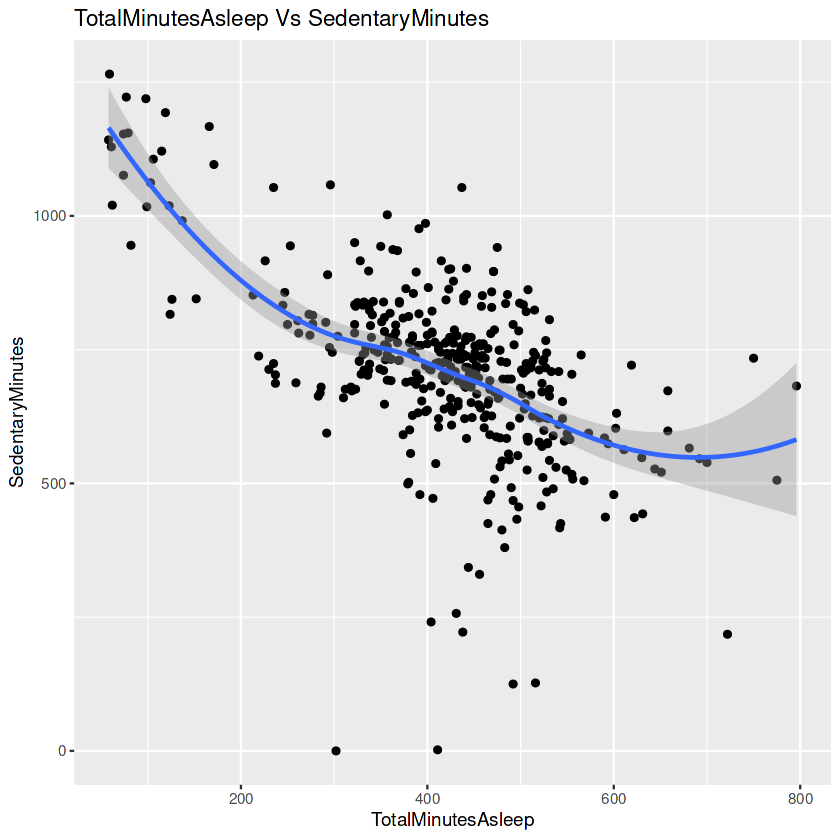

In [7]:
ggplot(data = combined_data, mapping = aes(x=TotalMinutesAsleep,y=SedentaryMinutes))+
  geom_point()+geom_smooth()+labs(title = "TotalMinutesAsleep Vs SedentaryMinutes")

* Negative relationship between the daily sleep and sedentary minutes hence BellaBeat sedentary time alert and sleep tracking feature should be advertise.


### Average total steps each hour of the day

Warning message in geom_histogram(stat = "identity", fill = "darkblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


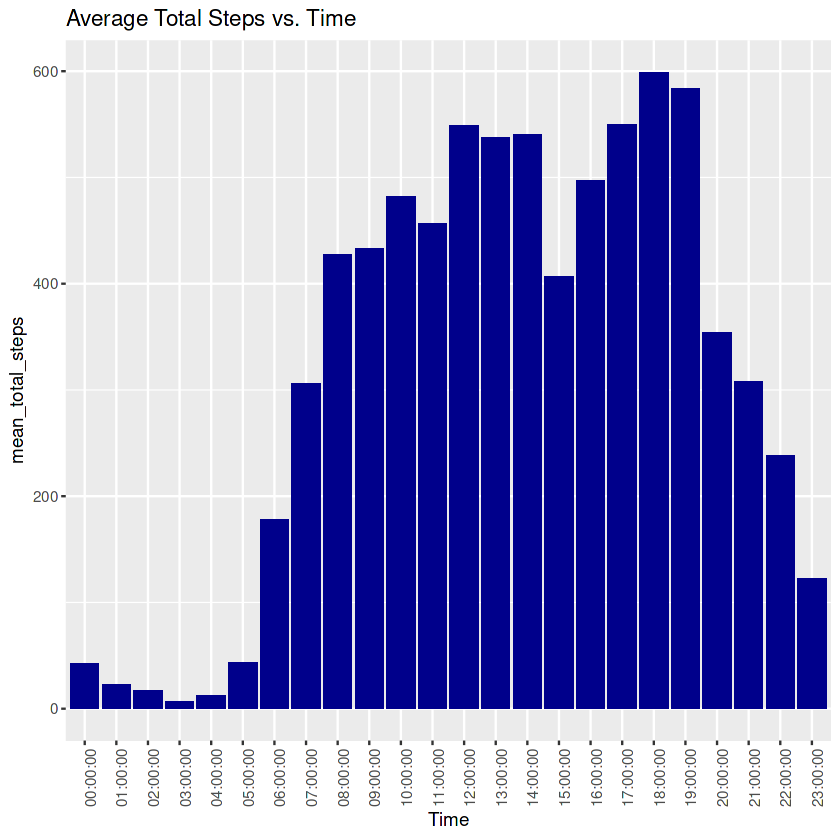

In [8]:
HS_new <- HrsStep%>%
  group_by(Time) %>%
  drop_na() %>%
  summarise(mean_total_steps = mean(StepTotal))

ggplot(data=HS_new, aes(x=Time, y=mean_total_steps)) + geom_histogram(stat = "identity", fill='darkblue') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Steps vs. Time")

* Highest total steps taken is between 5pm to 7pm

### Mean Daily Activity

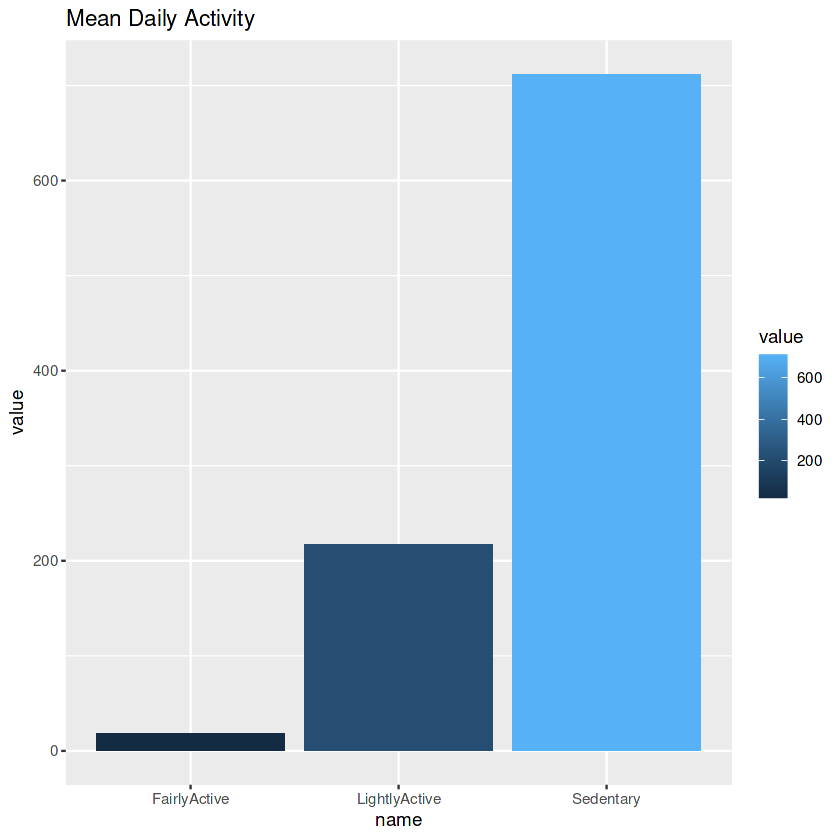

In [9]:
data<-data.frame(
  name=c("FairlyActive", "LightlyActive","Sedentary"),
  value=c(18, 217,712)
)
ggplot(data, aes(x=name, y=value, fill=value)) + 
  geom_bar(stat = "identity")+labs(title = "Mean Daily Activity")

## Recommended for BellaBeats marketing strategy

* Awareness campaign regarding health benefits of average daily steps recommended by Center for Disease Control and Prevention(CDC) i.e 8000 to 1000 steps and to achieve it using BellaBeats daily steps tracking     features.

* Marketing campaign featuring BellaBeats Sleep Tracker, highlighting benefits of daily recommended sleep of 7 hours or 420 minutes by Center for Disease Control and Prevention(CDC) and it effect on daily human      activity.

* Awareness campaign regarding sedentary lifestyle and its effect on human health. Encouraging people to reduce sedentary time using BellaBeats activity tracking feature.

## Thank You